<a href="https://colab.research.google.com/github/danishgawai/ML-dataset/blob/master/bigmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from google.colab import files 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
uploaded = files.upload()

Saving Train.csv to Train.csv


In [0]:
import  io
train = pd.read_csv(io.BytesIO(uploaded['Train.csv']))

In [0]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


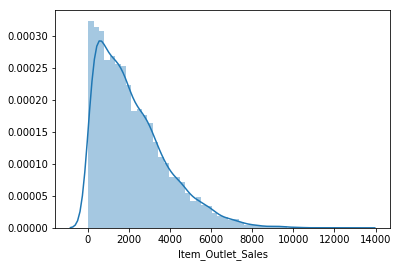

In [0]:
sns.distplot(train['Item_Outlet_Sales'])

In [0]:
#plt.plot(['Item_Outlet_Sales'],['Outlet_Establishment_Year'])

ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=train,palette="Set1" )

ValueError: ignored

In [0]:



train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
train['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
9.300     68
16.700    66
10.500    66
19.350    63
20.700    62
16.000    62
9.800     61
17.700    60
17.750    60
15.000    59
18.850    59
15.850    59
16.750    58
18.250    58
19.600    58
15.700    57
12.500    56
9.195     56
20.200    53
12.100    53
10.195    53
12.600    53
15.600    52
13.500    51
11.500    51
          ..
5.305      3
6.305      3
7.710      3
7.105      3
5.825      3
6.460      3
5.425      3
6.895      2
8.920      2
6.325      2
6.400      2
4.905      2
5.675      2
5.155      2
7.275      2
5.210      2
8.485      2
8.800      2
5.885      2
7.605      2
6.405      2
5.735      2
8.670      2
6.775      2
7.890      2
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [0]:
train.Item_Weight = train.Item_Weight.fillna(train.Item_Weight.mean())

In [0]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [0]:
train.Outlet_Size = train.Outlet_Size.fillna(method = 'ffill')

In [0]:
train['Outlet_Size'].value_counts()

Medium    3912
Small     3321
High      1290
Name: Outlet_Size, dtype: int64

In [0]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [0]:
train.Item_Fat_Content = train.Item_Fat_Content.replace({'LF':'Low Fat', 'low fat' : 'Low Fat', 'reg' : 'Regular' })

In [0]:
train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [0]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [0]:
train.shape

(8523, 12)

In [0]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [0]:
X = train.iloc[:,:11].values
y = train.iloc[:,11].values

In [0]:
y

array([3735.138 ,  443.4228, 2097.27  , ..., 1193.1136, 1845.5976,
        765.67  ])

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [0]:
labenc = LabelEncoder()
oneenc = OneHotEncoder(categorical_features=[7])
sc = StandardScaler()

In [0]:
for i in range(0,11):
  X[:,i] = labenc.fit_transform(X[:,i])
  i=i+2
X[:,9] = labenc.fit_transform(X[:,9])

In [0]:
X.shape

(8523, 11)

In [0]:
X = oneenc.fit_transform(X).toarray()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [0]:
X.shape

(8523, 19)

In [0]:
y = np.reshape(y,(len(y),1))
y.shape

(8523, 1)

In [0]:
X = sc.fit_transform(X)
y = sc.fit_transform(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.72)

In [0]:
X_train.shape

(6136, 19)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_varience = pca.explained_variance_ratio_

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [0]:
y_pred

array([[-0.21384762],
       [-0.6618694 ],
       [ 0.61880154],
       ...,
       [ 0.55758004],
       [-0.79177893],
       [-0.15479806]])

In [0]:
r2_score(y_test, y_pred)

0.13205006250297902

In [0]:
mean_squared_error(y_test,y_pred)

0.8940807792024085